In [3]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        #Creating Frame
        self.frame = Frame(self, width = 100, height = 100)
        self.frame.grid(row = 7, column = 1)
        
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swap_columns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        #self.scrollbar = Scrollbar(self)
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        
        self.vertical_frame = Scrollbar(self.frame,orient="vertical")
        self.horizontal_frame = Scrollbar(self.frame,orient="horizontal")
    
        
        #Creating treeview
        self.tree = Treeview(self.frame, h = 20, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 5, column = 0)
        self.option_box.grid(row = 6, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 5, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 6, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.loading_table()
        
        self.clear_table.grid(row = 1, column = 3)
        self.swap_columns.grid(row = 1, column = 4)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.grid(row = 7, column = 0, sticky = N+S+E+W)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        self.horizontal_frame.grid(row = 8, column = 2, sticky = E+W)
        self.tree['xscrollcommand'] = self.horizontal_frame
    
    def swap_columns(self):
        Label(self.buttonframe,text = 'Chose first column to swap!').grid(row = 5, column = 4)
        Label(self.buttonframe,text = 'Chose second column to swap!').grid(row = 5, column = 5)
        self.swap_first_column.grid(row =6, column = 4)
        self.swap_second_column.grid(row =6, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 5)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        col_list = list(self.df.columns)
        x, y = col_list.index(self.first_column_swap), col_list.index(self.second_column_swap)
        col_list[y], col_list[x] = col_list[x], col_list[y]
        self.df = self.df[col_list]
        self.loading_table()
        
    
    def loading_table(self):
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        self.df_rows = self.df.to_numpy().tolist()
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
        self.tree.grid(row = 7, column = 1, columnspan = 3)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.grid(row = 7, column = 0, sticky = N+S+E+W)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        self.horizontal_frame.grid(row = 8, column = 2, sticky = E+W)
        self.tree['xscrollcommand'] = self.horizontal_frame
        



app = VinkoExcel()
app.mainloop()               

In [ ]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swap_columns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        #self.scrollbar = Scrollbar(self)
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        
        
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 5, column = 0)
        self.option_box.grid(row = 6, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 5, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 6, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        self.loading_table()
        self.clear_table.grid(row = 1, column = 3)
        self.swap_columns.grid(row = 1, column = 4)
        
    
    def swap_columns(self):
        Label(self.buttonframe,text = 'Chose first column to swap!').grid(row = 5, column = 4)
        Label(self.buttonframe,text = 'Chose second column to swap!').grid(row = 5, column = 5)
        self.swap_first_column.grid(row =6, column = 4)
        self.swap_second_column.grid(row =6, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 5)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        col_list = list(self.df.columns)
        x, y = col_list.index(self.first_column_swap), col_list.index(self.second_column_swap)
        col_list[y], col_list[x] = col_list[x], col_list[y]
        self.df = self.df[col_list]
        self.loading_table()
        
    
    def loading_table(self):
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        self.df_rows = self.df.to_numpy().tolist()
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
        self.tree.grid(row = 0, column = 1, columnspan = 3)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.grid(row = 0, column = 0, sticky = N+S+E+W)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        self.horizontal_frame.grid(row = 1, column = 2, sticky = E+W)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('1080x720')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        #Creating treeview
        self.tree = Treeview(self.tableWindow, h = 20, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()



app = VinkoExcel()
app.mainloop() 

In [ ]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swap_columns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        #self.scrollbar = Scrollbar(self)
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        
        
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 5, column = 0)
        self.option_box.grid(row = 6, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 5, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 6, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        self.loading_table()
        self.clear_table.grid(row = 1, column = 3)
        self.swap_columns.grid(row = 1, column = 4)
        
    
    def swap_columns(self):
        Label(self.buttonframe,text = 'Chose first column to swap!').grid(row = 5, column = 4)
        Label(self.buttonframe,text = 'Chose second column to swap!').grid(row = 5, column = 5)
        self.swap_first_column.grid(row =6, column = 4)
        self.swap_second_column.grid(row =6, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 5)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        col_list = list(self.df.columns)
        x, y = col_list.index(self.first_column_swap), col_list.index(self.second_column_swap)
        col_list[y], col_list[x] = col_list[x], col_list[y]
        self.df = self.df[col_list]
        self.loading_table()
        
    
    def loading_table(self):
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        self.df_rows = self.df.to_numpy().tolist()
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
        self.tree.pack(fill = BOTH)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('1080x720')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        #Creating treeview  '''h = 20,'''
        self.tree = Treeview(self.tableWindow, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()



app = VinkoExcel()
app.mainloop()

In [23]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swap_columns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        #self.scrollbar = Scrollbar(self)
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        
        
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 5, column = 0)
        self.option_box.grid(row = 6, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 5, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 6, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.clear_table.grid(row = 1, column = 3)
        self.swap_columns.grid(row = 1, column = 4)
        
    
    def swap_columns(self):
        Label(self.buttonframe,text = 'Chose first column to swap!').grid(row = 5, column = 4)
        Label(self.buttonframe,text = 'Chose second column to swap!').grid(row = 5, column = 5)
        self.swap_first_column.grid(row =6, column = 4)
        self.swap_second_column.grid(row =6, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 5)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        self.clear_treeview()
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        
    
    def loading_table(self):
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
        self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        #Creating treeview  '''h = 20,'''
        self.tree = Treeview(self.tableWindow, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()



app = VinkoExcel()
app.mainloop()    

In [19]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        
        #Button positioning
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 6)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        Label(self.buttonframe,text = 'Chose first column to swap!').grid(row = 2, column = 4)
        Label(self.buttonframe,text = 'Chose second column to swap!').grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 5)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.clear_treeview()
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def removeColumn(self):
        self.clear_treeview()
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df.drop(column_to_remove, inplace=True, axis=1)
        
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
    def selectingOptions(self):
        if self.list_of_options.get() == 'remove column':
            Label(self.buttonframe,text = 'Chose column to to be deleted!').grid(row = 2, column = 4)
            self.remove_column.grid(row = 3, column = 4)
            self.b_remove_column.grid(row = 1, column = 4)
            
            for col in self.tree["column"]:
                self.remove_column.insert('end', col)
        if self.list_of_options.get() == 'swap column':
            self.swapColumns()
        



app = VinkoExcel()
app.mainloop()  

[[1032, 'fc-reading', 'GB1', 33.66, 26, 25.9, 12, 46.2, 6, 'Select Car Leasing Stadium', 24161, nan, 'Brian McDermott', 'https://www.transfermarkt.co.uk/fc-reading/startseite/verein/1032'], [2323, 'orduspor', 'TR1', nan, 0, nan, 0, nan, 0, '19 EylГјl Stadyum', 11024, 0, 'HГ©ctor CГєper', 'https://www.transfermarkt.co.uk/orduspor/startseite/verein/2323'], [1387, 'acn-siena-1904', 'IT1', 4.32, 30, 26.2, 6, 20.0, 2, 'Artemio Franchi', 15373, 'ВЈ-6Th.', 'Serse Cosmi', 'https://www.transfermarkt.co.uk/acn-siena-1904/startseite/verein/1387'], [1071, 'wigan-athletic', 'GB1', 12.38, 29, 26.5, 14, 48.3, 6, 'DW Stadium', 25133, 'ВЈ-140Th.', 'Roberto MartГ\xadnez', 'https://www.transfermarkt.co.uk/wigan-athletic/startseite/verein/1071'], [2703, 'spartak-vladikavkaz', 'RU1', nan, 1, 20.0, 0, nan, 0, 'Republican Stadium Spartak', 32464, 0, 'Vladimir Gazzaev', 'https://www.transfermarkt.co.uk/spartak-vladikavkaz/startseite/verein/2703'], [142, 'real-saragossa', 'ES1', 22.86, 24, 26.6, 5, 20.8, 0, 'L

In [21]:
# Program to make a simple
# login screen 
 
 
import tkinter as tk
  
root=tk.Tk()
 
# setting the windows size
root.geometry("600x400")
  
# declaring string variable
# for storing name and password
name_var=tk.StringVar()
passw_var=tk.StringVar()
 
  
# defining a function that will
# get the name and password and
# print them on the screen
def submit():
 
    name=name_var.get()
    password=passw_var.get()
     
    print("The name is : " + name)
    print("The password is : " + password)
     
    name_var.set("")
    passw_var.set("")
     
     
# creating a label for
# name using widget Label
name_label = tk.Label(root, text = 'Username', font=('calibre',10, 'bold'))
  
# creating a entry for input
# name using widget Entry
name_entry = tk.Entry(root,textvariable = name_var, font=('calibre',10,'normal'))
  
# creating a label for password
passw_label = tk.Label(root, text = 'Password', font = ('calibre',10,'bold'))
  
# creating a entry for password
passw_entry=tk.Entry(root, textvariable = passw_var, font = ('calibre',10,'normal'), show = '*')
  
# creating a button using the widget
# Button that will call the submit function
sub_btn=tk.Button(root,text = 'Submit', command = submit)
  
# placing the label and entry in
# the required position using grid
# method
name_label.grid(row=0,column=0)
name_entry.grid(row=0,column=1)
passw_label.grid(row=1,column=0)
passw_entry.grid(row=1,column=1)
sub_btn.grid(row=2,column=1)
  
# performing an infinite loop
# for the window to display
root.mainloop()

The name is : vinko
The password is : vinko2


In [ ]:
from tkinter import *
import tkinter as tk
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        self.rename_column_var = StringVar()
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        self.b_rename_column = Button(self.buttonframe, text = 'Rename Column', command = self.executeColumnRename)
        
        
        #Labels
        self.lb_chose_column_to_delete = Label(self.buttonframe,text = 'Chose column to to be deleted!')
        self.lb_first_column_swap = Label(self.buttonframe,text = 'Chose first column to swap!')
        self.lb_second_column_swap = Label(self.buttonframe,text = 'Chose second column to swap!')
        self.lb_column_to_rename = Label(self.buttonframe,text = 'Chose column to rename!')
        self.lb_rename_to = Label(self.buttonframe,text = 'Rename to:')
        
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        self.lbo_rename_column = Listbox(self.buttonframe)
        
        #Entry
        self.ent_rename_column = Entry(self.buttonframe,textvariable = self.rename_column_var)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        
        
        #Button positioning
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        #Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 7, sticky = N)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        self.lb_first_column_swap.grid(row = 2, column = 4)
        self.lb_second_column_swap.grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 4)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.clear_treeview()
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def removeColumn(self):
        '''Removes the chosen column by the user'''
        self.clear_treeview()
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df.drop(column_to_remove, inplace=True, axis=1)
        
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
    def selectingOptions(self):
        '''Operates which option you've chose and calls the function, that is bind to it'''
        self.hideButtonsOptions()
        if self.list_of_options.get() == 'remove column':
            self.lb_chose_column_to_delete.grid(row = 2, column = 4)
            self.remove_column.grid(row = 3, column = 4)
            self.b_remove_column.grid(row = 1, column = 4)
            
            for col in self.tree["column"]:
                self.remove_column.insert('end', col)
                
        elif self.list_of_options.get() == 'swap column':
            self.swapColumns()
        
        elif self.list_of_options.get() == 'rename column':
            self.renameColumn()
            
    def hideButtonsOptions(self):
        '''Removing anything from previous chosen option'''
        self.remove_column.grid_forget()
        self.b_remove_column.grid_forget()
        self.swap_first_column.grid_forget()
        self.swap_second_column.grid_forget()
        self.execute_swap_columns.grid_forget()
        self.b_rename_column.grid_forget()
        
        self.lb_column_to_rename.grid_forget()
        self.lb_rename_to.grid_forget()
        self.lb_first_column_swap.grid_remove()
        self.lb_second_column_swap.grid_forget()
        self.lb_chose_column_to_delete.grid_remove()
        
        self.lbo_rename_column.grid_forget()
        
        self.ent_rename_column.grid_forget()
    
    def renameColumn(self):
        '''Calling everything you need for the executeColumnRename'''
        self.lbo_rename_column.grid(row = 3, column = 4)
        self.b_rename_column.grid(row = 1, column = 4)
        self.lb_column_to_rename.grid(row = 2, column = 4)
        self.lb_rename_to.grid(row = 2, column = 5)
        self.ent_rename_column.grid(row = 3, column = 5, sticky = N)
        
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
            
        
    def executeColumnRename(self):
        '''By pressing the button Rename and writing to what you want to change it, the chosen column  will be changed'''
        self.clear_treeview()
        rename_to_column = self.rename_column_var.get()
        chosen_column_to_rename = self.lbo_rename_column.get(ANCHOR)
        
        self.df = self.df.rename(columns={chosen_column_to_rename: rename_to_column})
        
        self.tree["column"] = list(self.df.columns)
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        


app = VinkoExcel()
app.mainloop()    

In [2]:
from tkinter import *
import tkinter as tk
import tkinter.messagebox
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column', 'export file']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("400x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        # variables for entry
        self.rename_column_var = StringVar()
        self.file_name_var = StringVar()
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        self.b_rename_column = Button(self.buttonframe, text = 'Rename Column', command = self.executeColumnRename)
        self.b_export_column = Button(self.buttonframe, text = 'Export', command = self.ExportFile)
        
        
        #Labels
        self.lb_chose_column_to_delete = Label(self.buttonframe,text = 'Chose column to to be deleted!')
        self.lb_first_column_swap = Label(self.buttonframe,text = 'Chose first column to swap!')
        self.lb_second_column_swap = Label(self.buttonframe,text = 'Chose second column to swap!')
        self.lb_column_to_rename = Label(self.buttonframe,text = 'Chose column to rename!')
        self.lb_rename_to = Label(self.buttonframe,text = 'Rename to:')
        self.lb_file_name = Label(self.buttonframe,text = 'Enter the name of your file:')
        
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        self.lbo_rename_column = Listbox(self.buttonframe)
        
        #Entry
        self.ent_rename_column = Entry(self.buttonframe,textvariable = self.rename_column_var)
        self.ent_file_name = Entry(self.buttonframe,textvariable = self.file_name_var)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        
        
        #Button positioning
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        #Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 7, sticky = N)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        self.lb_first_column_swap.grid(row = 2, column = 4)
        self.lb_second_column_swap.grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
#         for col in self.tree["column"]:
#             self.swap_first_column.insert('end', col)
#         for col in self.tree["column"]:
#             self.swap_second_column.insert('end', col)
        self.execute_swap_columns.grid(row = 1, column = 4)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.clear_treeview()
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        #updating the Listboxes
        self.tree["column"] = list(self.df.columns)
        self.swap_first_column.delete(0,'end')
        self.swap_second_column.delete(0,'end')
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
            
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def PrepareForRemove(self):
        self.lb_chose_column_to_delete.grid(row = 2, column = 4)
        self.remove_column.grid(row = 3, column = 4)
        self.b_remove_column.grid(row = 1, column = 4)
            
#         for col in self.tree["column"]:
#             self.remove_column.insert('end', col)
    
    def removeColumn(self):
        '''Removes the chosen column by the user'''
        self.clear_treeview()
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df = self.df.drop(column_to_remove, axis=1)
        
        #updating the columns that exists
        self.tree["column"] = list(self.df.columns)
        self.remove_column.delete(0,'end')
        for col in self.tree["column"]:
            self.remove_column.insert('end', col)
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
    def selectingOptions(self):
        '''Operates which option you've chose and calls the function, that is bind to it'''
        self.hideButtonsOptions()
        self.UpdatingListboxes()
        if self.list_of_options.get() == 'remove column':
            self.PrepareForRemove()
                
        elif self.list_of_options.get() == 'swap column':
            self.swapColumns()
        
        elif self.list_of_options.get() == 'rename column':
            self.renameColumn()
            
        elif self.list_of_options.get() == 'export file':
            self.b_export_column.grid(row = 1, column = 4)
            self.lb_file_name.grid(row = 2, column = 4)
            self.ent_file_name.grid(row = 3, column = 4, sticky = N)
            
    def hideButtonsOptions(self):
        '''Removing anything from previous chosen option'''
        # Remove buttons
        self.remove_column.grid_forget()
        self.b_remove_column.grid_forget()
        self.swap_first_column.grid_forget()
        self.swap_second_column.grid_forget()
        self.execute_swap_columns.grid_forget()
        self.b_rename_column.grid_forget()
        self.b_export_column.grid_forget()
        
        #Remove Labels
        self.lb_column_to_rename.grid_forget()
        self.lb_rename_to.grid_forget()
        self.lb_first_column_swap.grid_remove()
        self.lb_second_column_swap.grid_forget()
        self.lb_chose_column_to_delete.grid_remove()
        self.lb_file_name.grid_forget()
        
        #Remove Listbox
        self.lbo_rename_column.grid_forget()
        
        #Remove Entries
        self.ent_rename_column.grid_forget()
        self.ent_file_name.grid_forget()
    
    def renameColumn(self):
        '''Calling everything you need for the executeColumnRename'''
        self.lbo_rename_column.grid(row = 3, column = 4)
        self.b_rename_column.grid(row = 1, column = 4)
        self.lb_column_to_rename.grid(row = 2, column = 4)
        self.lb_rename_to.grid(row = 2, column = 5)
        self.ent_rename_column.grid(row = 3, column = 5, sticky = N)
        
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
            
        
    def executeColumnRename(self):
        '''By pressing the button Rename and writing to what you want to change it, the chosen column  will be changed'''
        self.clear_treeview()
        rename_to_column = self.rename_column_var.get()
        chosen_column_to_rename = self.lbo_rename_column.get(ANCHOR)
        if rename_to_column not in self.tree["column"]:
            self.df = self.df.rename(columns={chosen_column_to_rename: rename_to_column})
        else:
            tkinter.messagebox.showinfo("Error",  "Column with this name already exists!")
            
        #reloading new columns 
        self.tree["column"] = list(self.df.columns)
        self.lbo_rename_column.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
        
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
    def ExportFile(self):
        '''Exports the xlsx file with a name of your choice'''
        file_name = self.file_name_var.get() + '.xlsx'
        if file_name not in file_options:
            self.df.to_excel(f"{file_name}",index=False)
            tkinter.messagebox.showinfo("Done",  "Your file has been created!")
        else:
            tkinter.messagebox.showinfo("Error",  "File with this name already exists!")
            
    def UpdatingListboxes(self):
        self.tree["column"] = list(self.df.columns)
            
        #rename 
        self.lbo_rename_column.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
        
        #remove
        self.remove_column.delete(0,'end')
        for col in self.tree["column"]:
            self.remove_column.insert('end', col)
        
        #swap
        self.swap_first_column.delete(0,'end')
        self.swap_second_column.delete(0,'end')
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
            
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        


app = VinkoExcel()
app.mainloop()   

In [ ]:
from tkinter import *
import tkinter as tk
import tkinter.messagebox
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 
import numpy as np

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column', 'export file']
options_for_column_to_add = ['fill 0', 'sum', 'average']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("800x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        # variables for entry
        self.rename_column_var = StringVar()
        self.file_name_var = StringVar()
        self.add_column_var = StringVar()
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        self.b_rename_column = Button(self.buttonframe, text = 'Rename Column', command = self.executeColumnRename)
        self.b_export_column = Button(self.buttonframe, text = 'Export', command = self.ExportFile)
        self.b_add_column = Button(self.buttonframe, text = 'Add Column', command = self.AddColumn)
        
        
        #Labels
        self.lb_chose_column_to_delete = Label(self.buttonframe,text = 'Chose column to to be deleted!')
        self.lb_first_column_swap = Label(self.buttonframe,text = 'Chose first column to swap!')
        self.lb_second_column_swap = Label(self.buttonframe,text = 'Chose second column to swap!')
        self.lb_column_to_rename = Label(self.buttonframe,text = 'Chose column to rename!')
        self.lb_rename_to = Label(self.buttonframe,text = 'Rename to:')
        self.lb_file_name = Label(self.buttonframe,text = 'Enter the name of your file:')
        self.lb_add_column = Label(self.buttonframe,text = 'Enter name of the column:')
        self.lb_add_column_option = Label(self.buttonframe,text = 'Options for adding:')
        
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        self.lbo_rename_column = Listbox(self.buttonframe)
        self.lbo_add_column_option = Listbox(self.buttonframe)
        
        #Entries
        self.ent_rename_column = Entry(self.buttonframe,textvariable = self.rename_column_var)
        self.ent_file_name = Entry(self.buttonframe,textvariable = self.file_name_var)
        self.ent_add_column = Entry(self.buttonframe,textvariable = self.add_column_var)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        #self.cmbo_add_column_option = Combobox(state = 'readonly', values = options_for_column_to_add)
        
        
        #Button positioning
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        #Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 7, sticky = N)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        self.lb_first_column_swap.grid(row = 2, column = 4)
        self.lb_second_column_swap.grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
        self.execute_swap_columns.grid(row = 1, column = 4)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.clear_treeview()
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.UpdatingListboxes()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def PrepareForRemove(self):
        '''Setting the layout for the remove option'''
        self.lb_chose_column_to_delete.grid(row = 2, column = 4)
        self.remove_column.grid(row = 3, column = 4)
        self.b_remove_column.grid(row = 1, column = 4)
            
    
    def removeColumn(self):
        '''Removes the chosen column by the user'''
        self.clear_treeview()
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df = self.df.drop(column_to_remove, axis=1)
        
        self.UpdatingListboxes()
        
    def selectingOptions(self):
        '''Operates which option you've chose and calls the function, that is bind to it'''
        self.hideButtonsOptions()
        self.UpdatingListboxes()
        if self.list_of_options.get() == 'remove column':
            self.PrepareForRemove()
                
        elif self.list_of_options.get() == 'swap column':
            self.swapColumns()
        
        elif self.list_of_options.get() == 'rename column':
            self.renameColumn()
            
        elif self.list_of_options.get() == 'export file':
            self.b_export_column.grid(row = 1, column = 4)
            self.lb_file_name.grid(row = 2, column = 4)
            self.ent_file_name.grid(row = 3, column = 4, sticky = N)
            
        elif self.list_of_options.get() == 'add column':
            self.PrepAddColumn()
            
    def hideButtonsOptions(self):
        '''Removing anything from previous chosen option'''
        # Remove buttons
        self.remove_column.grid_forget()
        self.b_remove_column.grid_forget()
        self.swap_first_column.grid_forget()
        self.swap_second_column.grid_forget()
        self.execute_swap_columns.grid_forget()
        self.b_rename_column.grid_forget()
        self.b_export_column.grid_forget()
        self.b_add_column.grid_forget()
        
        #Remove Labels
        self.lb_column_to_rename.grid_forget()
        self.lb_rename_to.grid_forget()
        self.lb_first_column_swap.grid_remove()
        self.lb_second_column_swap.grid_forget()
        self.lb_chose_column_to_delete.grid_remove()
        self.lb_file_name.grid_forget()
        self.lb_add_column.grid_forget()
        self.lb_add_column_option.grid_forget()
        
        #Remove Listbox
        self.lbo_rename_column.grid_forget()
        self.lbo_add_column_option.grid_forget()
        
        #Remove Entries
        self.ent_rename_column.grid_forget()
        self.ent_file_name.grid_forget()
        self.ent_add_column.grid_forget()
        
        #Remove Combobox
       

    
    def renameColumn(self):
        '''Calling everything you need for the executeColumnRename'''
        self.lbo_rename_column.grid(row = 3, column = 4)
        self.b_rename_column.grid(row = 1, column = 4)
        self.lb_column_to_rename.grid(row = 2, column = 4)
        self.lb_rename_to.grid(row = 2, column = 5)
        self.ent_rename_column.grid(row = 3, column = 5, sticky = N)
        
        
            
        
    def executeColumnRename(self):
        '''By pressing the button Rename and writing to what you want to change it, the chosen column  will be changed'''
        self.clear_treeview()
        rename_to_column = self.rename_column_var.get()
        chosen_column_to_rename = self.lbo_rename_column.get(ANCHOR)
        if rename_to_column not in self.tree["column"]:
            self.df = self.df.rename(columns={chosen_column_to_rename: rename_to_column})
        else:
            tkinter.messagebox.showinfo("Error",  "Column with this name already exists!")
            
        self.UpdatingListboxes()
        
    def ExportFile(self):
        '''Exports the xlsx file with a name of your choice'''
        file_name = self.file_name_var.get() + '.xlsx'
        if file_name not in file_options:
            self.df.to_excel(f"{file_name}",index=False)
            tkinter.messagebox.showinfo("Done",  "Your file has been created!")
        else:
            tkinter.messagebox.showinfo("Error",  "File with this name already exists!")
            
    def UpdatingListboxes(self):
        '''Updating the information in the Listboxes'''
        self.tree["column"] = list(self.df.columns)
            
        #rename 
        self.lbo_rename_column.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
        
        #remove
        self.remove_column.delete(0,'end')
        for col in self.tree["column"]:
            self.remove_column.insert('end', col)
        
        #swap
        self.swap_first_column.delete(0,'end')
        self.swap_second_column.delete(0,'end')
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
            
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
        #add
        
    def PrepAddColumn(self):
        self.b_add_column.grid(row = 1, column = 4)
        self.lb_add_column.grid(row = 2, column = 4)
        self.ent_add_column.grid(row = 3, column = 4, sticky = N)
        self.lb_add_column_option.grid(row = 2, column = 5)
        self.lbo_add_column_option.grid(row = 3, column = 5)
        self.lbo_add_column_option.delete(0, 'end')
        for option in options_for_column_to_add:
            self.lbo_add_column_option.insert('end', option)
    
    def AddColumn(self):
        add_column = self.add_column_var.get()
        if self.lbo_add_column_option.get(ANCHOR) == 'fill 0':
            self.df[add_column] = np.nan
            
        self.UpdatingListboxes()
        

app = VinkoExcel()
app.mainloop()

In [4]:
import tkinter as tk

app = tk.Tk()
app.title('List box')


def clicked():
    print("clicked")
    selected = box.curselection()  # returns a tuple
    print(selected)
    for idx in selected:
        print(box.get(idx))

box = tk.Listbox(app, selectmode=tk.MULTIPLE, height=4)
values = ['Red', 'Green', 'Blue', 'Purple', 'Yellow', 'Orange', 'Black', 'White']
for val in values:
    box.insert(tk.END, val)
box.pack()

button = tk.Button(app, text='Show', width=25, command=clicked)
button.pack()

exit_button = tk.Button(app, text='Close', width=25, command=app.destroy)
exit_button.pack()

app.mainloop()

clicked
(0,)
Red
clicked
(0, 1)
Red
Green
clicked
(0, 1, 2)
Red
Green
Blue


In [51]:
from tkinter import *
import tkinter as tk
import tkinter.messagebox
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 
import numpy as np

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column', 'export file']
options_for_column_to_add = ['fill 0', 'sum', 'average']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("800x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        # variables for entry
        self.rename_column_var = StringVar()
        self.file_name_var = StringVar()
        self.add_column_var = StringVar()
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        self.b_rename_column = Button(self.buttonframe, text = 'Rename Column', command = self.executeColumnRename)
        self.b_export_column = Button(self.buttonframe, text = 'Export', command = self.ExportFile)
        self.b_add_column = Button(self.buttonframe, text = 'Add Column', command = self.AddColumn)
        self.b_summ_column = Button(self.buttonframe, text = 'Sum Column', command = self.SumColumn)
        
        
        #Labels
        self.lb_chose_column_to_delete = Label(self.buttonframe,text = 'Chose column to to be deleted!')
        self.lb_first_column_swap = Label(self.buttonframe,text = 'Chose first column to swap!')
        self.lb_second_column_swap = Label(self.buttonframe,text = 'Chose second column to swap!')
        self.lb_column_to_rename = Label(self.buttonframe,text = 'Chose column to rename!')
        self.lb_rename_to = Label(self.buttonframe,text = 'Rename to:')
        self.lb_file_name = Label(self.buttonframe,text = 'Enter the name of your file:')
        self.lb_add_column = Label(self.buttonframe,text = 'Enter name of the column:')
        self.lb_add_column_option = Label(self.buttonframe,text = 'Options for adding:')
        self.lb_sum_column_option = Label(self.buttonframe,text = 'Which columns to sum:')
        
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        self.lbo_rename_column = Listbox(self.buttonframe)
        self.lbo_add_column_option = Listbox(self.buttonframe)
        self.lbo_summ_column = Listbox(self.buttonframe, selectmode = "multiple")
        
        #Entries
        self.ent_rename_column = Entry(self.buttonframe,textvariable = self.rename_column_var)
        self.ent_file_name = Entry(self.buttonframe,textvariable = self.file_name_var)
        self.ent_add_column = Entry(self.buttonframe,textvariable = self.add_column_var)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        #self.cmbo_add_column_option = Combobox(state = 'readonly', values = options_for_column_to_add)
        
        
        #Button positioning
        self.launch.grid(row = 1)
        
        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        #Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 7, sticky = N)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        self.lb_first_column_swap.grid(row = 2, column = 4)
        self.lb_second_column_swap.grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
        self.execute_swap_columns.grid(row = 1, column = 4)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.UpdatingListboxes()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        self.clear_treeview()
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def PrepareForRemove(self):
        '''Setting the layout for the remove option'''
        self.lb_chose_column_to_delete.grid(row = 2, column = 4)
        self.remove_column.grid(row = 3, column = 4)
        self.b_remove_column.grid(row = 1, column = 4)
            
    
    def removeColumn(self):
        '''Removes the chosen column by the user'''
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df = self.df.drop(column_to_remove, axis=1)
        
        self.UpdatingListboxes()
        
    def selectingOptions(self):
        '''Operates which option you've chose and calls the function, that is bind to it'''
        self.hideButtonsOptions()
        self.UpdatingListboxes()
        if self.list_of_options.get() == 'remove column':
            self.PrepareForRemove()
                
        elif self.list_of_options.get() == 'swap column':
            self.swapColumns()
        
        elif self.list_of_options.get() == 'rename column':
            self.renameColumn()
            
        elif self.list_of_options.get() == 'export file':
            self.b_export_column.grid(row = 1, column = 4)
            self.lb_file_name.grid(row = 2, column = 4)
            self.ent_file_name.grid(row = 3, column = 4, sticky = N)
            
        elif self.list_of_options.get() == 'add column':
            self.PrepAddColumn()
            
    def hideButtonsOptions(self):
        '''Removing anything from previous chosen option'''
        # Remove buttons
        self.remove_column.grid_forget()
        self.b_remove_column.grid_forget()
        self.swap_first_column.grid_forget()
        self.swap_second_column.grid_forget()
        self.execute_swap_columns.grid_forget()
        self.b_rename_column.grid_forget()
        self.b_export_column.grid_forget()
        self.b_add_column.grid_forget()
        
        #Remove Labels
        self.lb_column_to_rename.grid_forget()
        self.lb_rename_to.grid_forget()
        self.lb_first_column_swap.grid_remove()
        self.lb_second_column_swap.grid_forget()
        self.lb_chose_column_to_delete.grid_remove()
        self.lb_file_name.grid_forget()
        self.lb_add_column.grid_forget()
        self.lb_add_column_option.grid_forget()
        
        #Remove Listbox
        self.lbo_rename_column.grid_forget()
        self.lbo_add_column_option.grid_forget()
        self.lbo_summ_column.grid_forget()
        
        #Remove Entries
        self.ent_rename_column.grid_forget()
        self.ent_file_name.grid_forget()
        self.ent_add_column.grid_forget()
        
        #Remove Combobox
       

    
    def renameColumn(self):
        '''Calling everything you need for the executeColumnRename'''
        self.lbo_rename_column.grid(row = 3, column = 4)
        self.b_rename_column.grid(row = 1, column = 4)
        self.lb_column_to_rename.grid(row = 2, column = 4)
        self.lb_rename_to.grid(row = 2, column = 5)
        self.ent_rename_column.grid(row = 3, column = 5, sticky = N)
        
        
            
        
    def executeColumnRename(self):
        '''By pressing the button Rename and writing to what you want to change it, the chosen column  will be changed'''
        rename_to_column = self.rename_column_var.get()
        chosen_column_to_rename = self.lbo_rename_column.get(ANCHOR)
        if rename_to_column not in self.tree["column"]:
            self.df = self.df.rename(columns={chosen_column_to_rename: rename_to_column})
        else:
            tkinter.messagebox.showinfo("Error",  "Column with this name already exists!")
            
        self.UpdatingListboxes()
        
    def ExportFile(self):
        '''Exports the xlsx file with a name of your choice'''
        file_name = self.file_name_var.get() + '.xlsx'
        if file_name not in file_options:
            self.df.to_excel(f"{file_name}",index=False)
            tkinter.messagebox.showinfo("Done",  "Your file has been created!")
        else:
            tkinter.messagebox.showinfo("Error",  "File with this name already exists!")
            
    def UpdatingListboxes(self):
        '''Updating the information in the Listboxes'''
        self.tree["column"] = list(self.df.columns)
            
        #rename 
        self.lbo_rename_column.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
        
        #remove
        self.remove_column.delete(0,'end')
        for col in self.tree["column"]:
            self.remove_column.insert('end', col)
        
        #swap
        self.swap_first_column.delete(0,'end')
        self.swap_second_column.delete(0,'end')
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
            
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
        
        #add
        
    def PrepAddColumn(self):
        self.b_add_column.grid(row = 1, column = 4)
        self.lb_add_column.grid(row = 2, column = 4)
        self.ent_add_column.grid(row = 3, column = 4, sticky = N)
        self.lb_add_column_option.grid(row = 2, column = 5)
        self.lbo_add_column_option.grid(row = 3, column = 5)
        self.lbo_add_column_option.delete(0, 'end')
        for option in options_for_column_to_add:
            self.lbo_add_column_option.insert('end', option)
    
    def AddColumn(self):
        self.add_column_name = self.add_column_var.get()
        if self.lbo_add_column_option.get(ANCHOR) == 'fill 0':
            self.df[self.add_column_name] = np.nan

        if self.lbo_add_column_option.get(ANCHOR) == 'sum':
            self.lbo_summ_column.grid(row = 3, column = 6)
            self.b_summ_column.grid(row = 1, column = 5)
            self.lb_sum_column_option.grid(row = 2, column = 6)
            self.lbo_summ_column.delete(0,'end')
            self.df[self.add_column_name] = 0
            for col in self.tree["column"]:
                self.lbo_summ_column.insert('end', col)
            
        self.UpdatingListboxes()
    
    def SumColumn(self):
        to_sum_column = self.lbo_summ_column.curselection()
        to_sum_column_list = []
        for item in to_sum_column:
            #print(self.df[self.tree["column"][item]].dtypes)
            if self.df[self.tree["column"][item]].dtypes != object:
                to_sum_column_list.append(self.df[self.tree["column"][item]])
                self.df[self.add_column_name] += self.df[self.tree["column"][item]]
        
        self.UpdatingListboxes()    
        
            
app = VinkoExcel()
app.mainloop()

[Text(0, 0, '4,000'), Text(0, 0, '2,000'), Text(0, 0, '7,000')]

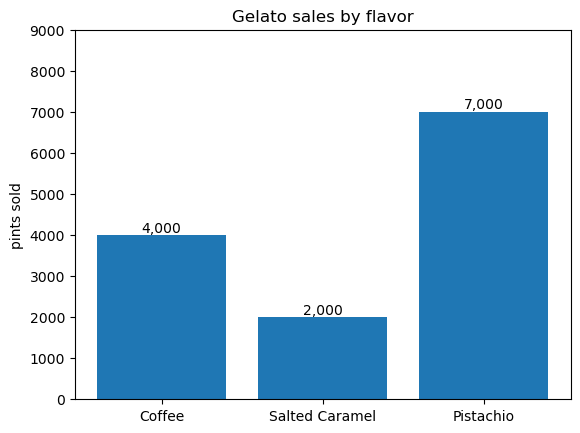

In [4]:
import matplotlib.pyplot as plt
fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.bar(fruit_names, fruit_counts)
ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 9000))
ax.bar_label(bar_container, fmt='{:,.0f}')

In [51]:
data = {
  "calories": [420, 380, 390],
  "duration": ['ivan','peter', 'vinko the great leader']
}


In [52]:
import matplotlib.pyplot as plt
import numpy as np

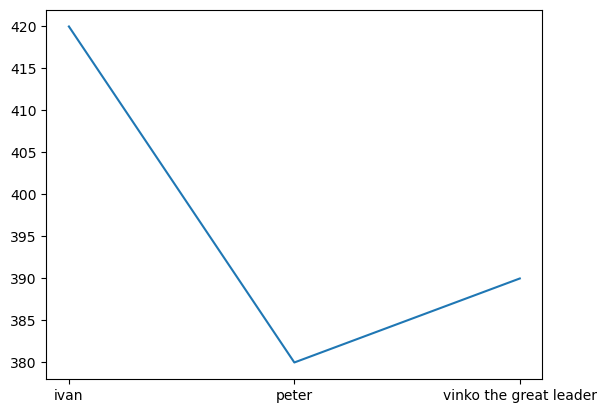

In [56]:
yaxis = np.array(data['calories'])
xaxis = np.array(data['duration'])

plt.plot(xaxis, yaxis)
plt.show()

ValueError: 'sa' is neither a data key nor a valid format string (unrecognized character 'a')

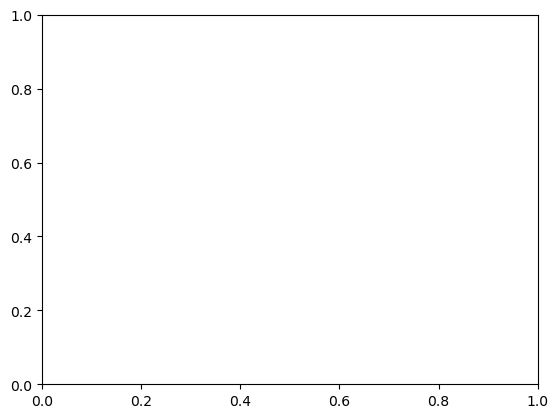

In [42]:
yaxis = np.array(data['calories'])
print(yaxis)

[420 380 390]


In [ ]:
from tkinter import *
import tkinter as tk
import tkinter.messagebox
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 
import numpy as np
import matplotlib.pyplot as plt

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column', 'export file', 'data visualization']
options_for_column_to_add = ['fill 0', 'sum', 'average']
options_for_data_visualization = ['plot']

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("800x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        # variables for entry
        self.rename_column_var = StringVar()
        self.file_name_var = StringVar()
        self.add_column_var = StringVar()
        
        
        #Buttons
        self.launch = Button(self.buttonframe, text = 'Launch', command = self.Launch)
        self.select_file = Button(self.buttonframe, text = 'Select file', command = self.SelectFile)
        self.select_sheet = Button(self.buttonframe, text = 'Select sheet', command = self.SelectSheet)
        self.clear_table = Button(self.buttonframe, text = 'Clear table', command = self.clear_treeview)
        #self.swap_columns = Button(self.buttonframe, text = 'Swap Columns', command = self.swapColumns)
        self.execute_swap_columns = Button(self.buttonframe, text = 'Execute Swap Columns', command = self.execute_swaping_columns)
        self.option_manipulate_column = Button(self.buttonframe, text = 'Chose option:', command = self.selectingOptions)
        self.b_remove_column = Button(self.buttonframe, text = 'Remove Column', command = self.removeColumn)
        self.b_rename_column = Button(self.buttonframe, text = 'Rename Column', command = self.executeColumnRename)
        self.b_export_column = Button(self.buttonframe, text = 'Export', command = self.ExportFile)
        self.b_add_column = Button(self.buttonframe, text = 'Add Column', command = self.AddColumn)
        self.b_summ_column = Button(self.buttonframe, text = 'Sum Column', command = self.SumColumn)
        self.b_data_visualization = Button(self.buttonframe, text = 'Select', command = self.SelectingChartType)
        self.b_create_plot = Button(self.buttonframe, text = 'Create Chart', command = self.ShowPlotChart)
        
        
        #Labels
        self.lb_chose_column_to_delete = Label(self.buttonframe,text = 'Chose column to to be deleted!')
        self.lb_first_column_swap = Label(self.buttonframe,text = 'Chose first column to swap!')
        self.lb_second_column_swap = Label(self.buttonframe,text = 'Chose second column to swap!')
        self.lb_column_to_rename = Label(self.buttonframe,text = 'Chose column to rename!')
        self.lb_rename_to = Label(self.buttonframe,text = 'Rename to:')
        self.lb_file_name = Label(self.buttonframe,text = 'Enter the name of your file:')
        self.lb_add_column = Label(self.buttonframe,text = 'Enter name of the column:')
        self.lb_add_column_option = Label(self.buttonframe,text = 'Options for adding:')
        self.lb_sum_column_option = Label(self.buttonframe,text = 'Which columns to sum:')
        self.lb_data_visualization = Label(self.buttonframe,text = 'Select chart type:')
        self.lb_select_xaxis = Label(self.buttonframe,text = 'x-axis data selection')
        self.lb_select_yaxis = Label(self.buttonframe,text = 'y-axis data selection')
        
        
        #ListBoxes
        self.option_box = Listbox(self.buttonframe)
        self.sheets_box = Listbox(self.buttonframe)
        self.swap_first_column = Listbox(self.buttonframe)
        self.swap_second_column = Listbox(self.buttonframe, exportselection=False)
        self.remove_column = Listbox(self.buttonframe)
        self.lbo_rename_column = Listbox(self.buttonframe)
        self.lbo_add_column_option = Listbox(self.buttonframe)
        self.lbo_summ_column = Listbox(self.buttonframe, selectmode = "multiple")
        self.lbo_visualization_option = Listbox(self.buttonframe)
        self.lbo_xaxis_options = Listbox(self.buttonframe)
        self.lbo_yaxis_options = Listbox(self.buttonframe, exportselection=False)
        
        #Entries
        self.ent_rename_column = Entry(self.buttonframe,textvariable = self.rename_column_var)
        self.ent_file_name = Entry(self.buttonframe,textvariable = self.file_name_var)
        self.ent_add_column = Entry(self.buttonframe,textvariable = self.add_column_var)
        
        #ComboBoxes
        self.list_of_options = Combobox(state = 'readonly', values = options_for_user )
        #self.cmbo_add_column_option = Combobox(state = 'readonly', values = options_for_column_to_add)
        
        
        #Button positioning
        self.launch.grid(row = 1)

        
    def clear_treeview(self):
        '''clearing the dataframe data'''
        self.tree.delete(*self.tree.get_children())
    
    def Launch(self):
        '''starting the program and creating selectfile button and the option box'''
        #self.option_box.delete(0,'end') # removing everything  in file options
        self.select_file.grid(row = 1)
        Label(self.buttonframe,text = 'Chose file.').grid(row = 2, column = 0)
        self.option_box.grid(row = 3, column = 0)
        self.launch.grid_forget()
        for file in range(len(file_options)):
            self.option_box.insert('end', file_options[file])
        self.openTableWindow()
    
    def SelectFile(self):
        '''selecting the working file and then creating the selectsheet button and the sheet option box'''
        self.sheets_box.delete(0,'end')
        Label(self.buttonframe,text = 'Chose sheet.').grid(row = 2, column = 1)
        #self.show.config(text=self.option_box.get(ANCHOR))
        self.chosen_file = self.option_box.get(ANCHOR)
        xl = pd.ExcelFile(self.chosen_file)  #picking sheets
        sheets_list = xl.sheet_names
        self.sheets_box.grid(row = 3, column = 1)
        self.select_sheet.grid(row = 1, column = 1)
        for sheet in range(len(sheets_list)):
            self.sheets_box.insert('end',sheets_list[sheet])
        
    def SelectSheet(self):
        '''selecting the sheet we want to work with'''
        self.chosen_sheet = self.sheets_box.get(ANCHOR)
        self.df = pd.read_excel(self.chosen_file, sheet_name = self.chosen_sheet)
        '''filling the treeview with data from the df we chose'''
        self.tree["column"] = list(self.df.columns)
        self.tree["show"] = "headings"
        self.df_rows = self.df.to_numpy().tolist()
        
        self.loading_table()
        self.option_manipulate_column.grid(row = 1, column = 6)
        #Label(self.buttonframe, text = 'Options:').grid(row = 2, column = 6)
        self.list_of_options.grid(row = 0 , column = 7, sticky = N)
        self.clear_table.grid(row = 1, column = 3)
        
    
    def swapColumns(self):
        '''Popup the two list boxes through which the user can select columns'''
        self.lb_first_column_swap.grid(row = 2, column = 4)
        self.lb_second_column_swap.grid(row = 2, column = 5)
        self.swap_first_column.grid(row =3, column = 4)
        self.swap_second_column.grid(row =3, column = 5)
        self.execute_swap_columns.grid(row = 1, column = 4)
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
            
    def execute_swaping_columns(self):
        '''Swaping the two columns, chosen by the user'''
        self.first_column_swap = self.swap_first_column.get(ANCHOR)
        self.second_column_swap = self.swap_second_column.get(ANCHOR)
        first_column_index = self.tree["column"].index(self.first_column_swap)
        second_column_index = self.tree["column"].index(self.second_column_swap)
        moved_column_one = self.df.pop(self.first_column_swap)
        moved_column_two = self.df.pop(self.second_column_swap)
        
        if first_column_index < second_column_index:
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
        else:
            self.df.insert(second_column_index, self.first_column_swap, moved_column_one)
            self.df.insert(first_column_index, self.second_column_swap, moved_column_two)
            
        self.UpdatingListboxes()
        
    
    def loading_table(self):
        '''Loads the table with data'''
        self.clear_treeview()
        # For Headings iterate over the columns
        for col in self.tree["column"]:
            self.tree.heading(col, text=col)
            self.tree.column(col, stretch=True, width = 50)
        # Put Data in Rows
        for row in self.df_rows:
            self.tree.insert("", "end", values=row)
            self.tree.pack(fill = X)
        
        #Creating a scrollbar
        self.vertical_frame.config(command = self.tree.yview)
        self.vertical_frame.pack(side = RIGHT, fill = Y)
        self.tree['yscrollcommand'] = self.vertical_frame
        
        self.horizontal_frame.config(command = self.tree.xview)
        #self.horizontal_frame.pack(side = BOTTOM, fill = X)
        self.tree['xscrollcommand'] = self.horizontal_frame
        
    def openTableWindow(self):
        '''Opening another window, where the data will be displayed'''
        self.tableWindow = Toplevel(self)
        self.tableWindow.geometry('500x300')
        self.tableWindow.title('Table Window')
        self.vertical_frame = Scrollbar(self.tableWindow, orient="vertical")
        self.horizontal_frame = Scrollbar(self.tableWindow, orient="horizontal")
        
        self.tree = Treeview(self.tableWindow, h = 30, xscrollcommand=self.horizontal_frame.set, yscrollcommand=self.vertical_frame.set)
        #clear_treeview()
        
    def PrepareForRemove(self):
        '''Setting the layout for the remove option'''
        self.lb_chose_column_to_delete.grid(row = 2, column = 4)
        self.remove_column.grid(row = 3, column = 4)
        self.b_remove_column.grid(row = 1, column = 4)
            
    
    def removeColumn(self):
        '''Removes the chosen column by the user'''
        column_to_remove = self.remove_column.get(ANCHOR)
        self.df = self.df.drop(column_to_remove, axis=1)
        
        self.UpdatingListboxes()
        
    def selectingOptions(self):
        '''Operates which option you've chose and calls the function, that is bind to it'''
        self.hideButtonsOptions()
        self.UpdatingListboxes()
        if self.list_of_options.get() == 'remove column':
            self.PrepareForRemove()
                
        elif self.list_of_options.get() == 'swap column':
            self.swapColumns()
        
        elif self.list_of_options.get() == 'rename column':
            self.renameColumn()
            
        elif self.list_of_options.get() == 'export file':
            self.b_export_column.grid(row = 1, column = 4)
            self.lb_file_name.grid(row = 2, column = 4)
            self.ent_file_name.grid(row = 3, column = 4, sticky = N)
            
        elif self.list_of_options.get() == 'add column':
            self.PrepAddColumn()
            
        elif self.list_of_options.get() == 'data visualization':
            self.PrepDataVisualization()
            
    def hideButtonsOptions(self):
        '''Removing anything from previous chosen option'''
        # Remove buttons
        self.remove_column.grid_forget()
        self.b_remove_column.grid_forget()
        self.swap_first_column.grid_forget()
        self.swap_second_column.grid_forget()
        self.execute_swap_columns.grid_forget()
        self.b_rename_column.grid_forget()
        self.b_export_column.grid_forget()
        self.b_add_column.grid_forget()
        self.b_summ_column.grid_forget()
        self.b_data_visualization.grid_forget()
        
        #Remove Labels
        self.lb_column_to_rename.grid_forget()
        self.lb_rename_to.grid_forget()
        self.lb_first_column_swap.grid_remove()
        self.lb_second_column_swap.grid_forget()
        self.lb_chose_column_to_delete.grid_remove()
        self.lb_file_name.grid_forget()
        self.lb_add_column.grid_forget()
        self.lb_add_column_option.grid_forget()
        self.lb_sum_column_option.grid_forget()
        self.lb_data_visualization.grid_forget()
        
        #Remove Listbox
        self.lbo_rename_column.grid_forget()
        self.lbo_add_column_option.grid_forget()
        self.lbo_summ_column.grid_forget()
        self.lbo_visualization_option.grid_forget()
        
        #Remove Entries
        self.ent_rename_column.grid_forget()
        self.ent_file_name.grid_forget()
        self.ent_add_column.grid_forget()
        
        #Remove Combobox

    
    def renameColumn(self):
        '''Calling everything you need for the executeColumnRename'''
        self.lbo_rename_column.grid(row = 3, column = 4)
        self.b_rename_column.grid(row = 1, column = 4)
        self.lb_column_to_rename.grid(row = 2, column = 4)
        self.lb_rename_to.grid(row = 2, column = 5)
        self.ent_rename_column.grid(row = 3, column = 5, sticky = N)
        
        
            
        
    def executeColumnRename(self):
        '''By pressing the button Rename and writing to what you want to change it, the chosen column  will be changed'''
        rename_to_column = self.rename_column_var.get()
        chosen_column_to_rename = self.lbo_rename_column.get(ANCHOR)
        if rename_to_column not in self.tree["column"]:
            self.df = self.df.rename(columns={chosen_column_to_rename: rename_to_column})
        else:
            tkinter.messagebox.showinfo("Error",  "Column with this name already exists!")
            
        self.UpdatingListboxes()
        
    def ExportFile(self):
        '''Exports the xlsx file with a name of your choice'''
        file_name = self.file_name_var.get() + '.xlsx'
        if file_name not in file_options:
            self.df.to_excel(f"{file_name}",index=False)
            tkinter.messagebox.showinfo("Done",  "Your file has been created!")
        else:
            tkinter.messagebox.showinfo("Error",  "File with this name already exists!")
            
    def UpdatingListboxes(self):
        '''Updating the information in the Listboxes'''
        self.tree["column"] = list(self.df.columns)
            
        #rename 
        self.lbo_rename_column.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_rename_column.insert('end', col)
        
        #remove
        self.remove_column.delete(0,'end')
        for col in self.tree["column"]:
            self.remove_column.insert('end', col)
        
        #swap
        self.swap_first_column.delete(0,'end')
        self.swap_second_column.delete(0,'end')
        for col in self.tree["column"]:
            self.swap_first_column.insert('end', col)
        for col in self.tree["column"]:
            self.swap_second_column.insert('end', col)
            
        #add
        self.lbo_summ_column.delete(0, 'end')
        for col in self.tree["column"]:
            self.lbo_summ_column.insert('end', col)
            
        self.df_rows = self.df.to_numpy().tolist()
        self.loading_table()
    
        
        
    def PrepAddColumn(self):
        '''Add the buttons and labels in the layout to add a column'''
        self.b_add_column.grid(row = 1, column = 4)
        self.lb_add_column.grid(row = 2, column = 4)
        self.ent_add_column.grid(row = 3, column = 4, sticky = N)
        self.lb_add_column_option.grid(row = 2, column = 5)
        self.lbo_add_column_option.grid(row = 3, column = 5)
        self.lbo_add_column_option.delete(0, 'end')
        for option in options_for_column_to_add:
            self.lbo_add_column_option.insert('end', option)
    
    def AddColumn(self):
        '''Create an empty column (fill) or create a column with values =0'''
        self.add_column_name = self.add_column_var.get()
        if self.lbo_add_column_option.get(ANCHOR) == 'fill 0':
            self.df[self.add_column_name] = np.nan

        elif self.lbo_add_column_option.get(ANCHOR) == 'sum':
            self.lbo_summ_column.grid(row = 3, column = 6)
            self.b_summ_column.grid(row = 1, column = 5)
            self.lb_sum_column_option.grid(row = 2, column = 6)
            self.lbo_summ_column.delete(0,'end')
            self.df[self.add_column_name] = 0
            for col in self.tree["column"]:
                self.lbo_summ_column.insert('end', col)
                
        #elif self.lbo_add_column_option.get(ANCHOR) == 'average':
        
        self.UpdatingListboxes()
    
    def SumColumn(self):
        '''Sum of chosen columns, which contain numeric values'''
        to_sum_column = self.lbo_summ_column.curselection()
        for item in to_sum_column:
            if self.df[self.tree["column"][item]].dtypes != object:
                self.df[self.add_column_name] += self.df[self.tree["column"][item]]
        
        self.UpdatingListboxes() 
        
    def PrepDataVisualization(self):
        '''Add the buttons and labels in the layout to data visualization'''
        self.b_data_visualization.grid(row = 1, column = 4)
        self.lb_data_visualization.grid(row = 2, column = 4)
        self.lbo_visualization_option.grid(row = 3, column = 4)
        self.lbo_visualization_option.delete(0, 'end')
        for option in options_for_data_visualization:
            self.lbo_visualization_option.insert('end', option)
        
        self.UpdatingListboxes()
        #self.SelectingChartType()
            
    def SelectingChartType(self):
        '''Create ListBoxes so that x and y axis columns are selected and create the selected chart type'''
        if self.lbo_visualization_option.get(ANCHOR) == 'plot':
            self.CreatePlotChart()
            
        self.hideButtonsOptions()
        
    def CreatePlotChart(self):
        '''Create the plot chart based on the users selection for the x and y axes'''
        self.b_create_plot.grid(row = 1, column = 4)
        self.lb_select_xaxis.grid(row = 2, column = 4)
        self.lb_select_yaxis.grid(row = 2, column = 5)
        self.lbo_xaxis_options.grid(row = 3, column = 4)
        self.lbo_yaxis_options.grid(row = 3, column = 5)
        
        self.lbo_xaxis_options.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_xaxis_options.insert('end', col)
        self.lbo_yaxis_options.delete(0,'end')
        for col in self.tree["column"]:
            self.lbo_yaxis_options.insert('end', col)
            
    def ShowPlotChart(self):
        chosen_xaxis = self.lbo_xaxis_options.get(ANCHOR)
        chosen_yaxis = self.lbo_yaxis_options.get(ANCHOR)
        xaxis = np.array(self.df[chosen_xaxis])
        yaxis = np.array(self.df[chosen_yaxis])
        plt.plot(chosen_xaxis, chosen_yaxis, data = self.df)
        plt.show()
        
        
        
            
app = VinkoExcel()
app.mainloop()

In [50]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

data1 = {'country': ['A', 'B', 'C', 'D', 'E'],
         'gdp_per_capita': [45000, 42000, 52000, 49000, 47000]
         }
df1 = pd.DataFrame(data1)

data2 = {'year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
         'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
         }  
df2 = pd.DataFrame(data2)

data3 = {'interest_rate': [5, 5.5, 6, 5.5, 5.25, 6.5, 7, 8, 7.5, 8.5],
         'index_price': [1500, 1520, 1525, 1523, 1515, 1540, 1545, 1560, 1555, 1565]
         }
df3 = pd.DataFrame(data3)

root = tk.Tk()

figure1 = plt.Figure(figsize=(6, 5), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df1 = df1[['country', 'gdp_per_capita']].groupby('country').sum()
df1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('Country Vs. GDP Per Capita')

figure2 = plt.Figure(figsize=(5, 4), dpi=100)
ax2 = figure2.add_subplot(111)
line2 = FigureCanvasTkAgg(figure2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df2 = df2[['year', 'unemployment_rate']].groupby('year').sum()
df2.plot(kind='line', legend=True, ax=ax2, color='r', marker='o', fontsize=10)
ax2.set_title('Year Vs. Unemployment Rate')

figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df3['interest_rate'], df3['index_price'], color='g')
scatter3 = FigureCanvasTkAgg(figure3, root)
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend(['index_price'])
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Index Price')

root.mainloop()

In [69]:
from tkinter import *
import tkinter as tk
import tkinter.messagebox
from pathlib import Path
from datetime import datetime
from tkinter.ttk import *
import os
import re
import pandas as pd
import numpy 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

'''Crating a list of all excel files in the folder'''
Direc = os.getcwd()
files = os.listdir(Direc)
files = [f for f in files if os.path.isfile(Direc+'/'+f)] #Filtering only the files.
r = re.compile(".*xlsx")
file_options = list(filter(r.match, files))
options_for_user = ['remove column', 'add column', 'rename column', 'swap column', 'export file', 'data visualization']
options_for_column_to_add = ['fill 0', 'sum', 'average']
options_for_data_visualization = ['plot']
track_list = []

class VinkoExcel(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.geometry("800x400")
        self.title('VinkoExcel')
       # Label(self, text = 'Welcome to VinkoExcel!').grid()
        '''Creating frames'''
        #Creating Buttonframe
        self.buttonframe = Frame(self, width = 100, height = 50)
        self.buttonframe.grid()
        
        
        # ot tuka sa promenite
        self.print_text = StringVar()
        
        self.print = Button(self.buttonframe, text = 'Print', command = self.PrintText)
        self.back = Button(self.buttonframe, text = 'Back', command = self.Back)
        
        self.ent_print = Entry(self.buttonframe,textvariable = self.print_text)
        
        self.print.pack()
        self.back.pack()
        self.ent_print.pack()
        
    def PrintText(self):
        print_text = self.print_text.get()
        track_list.append(print_text)
        print(track_list)
        #self.track_count += 1
        # naprei go u funkciq da se vika 
    
    def Back(self):
        if len(track_list) >= 2:
            print(track_list[len(track_list) - 2])
            track_list.pop()
        else:
            tkinter.messagebox.showinfo("!",  "This is the first version")
    
    
app = VinkoExcel()
app.mainloop() 

['1']
['1', '2']
['1', '2', '3']
['1', '2', '3', '4']
3
2
['1', '2', '5']
2
1
